In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import seaborn as sns
import warnings
import gc
warnings.filterwarnings('ignore')

In [2]:
data_dir = '/work/data'

In [3]:
train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))

In [4]:
train_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [5]:
train_df.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [6]:
train_df.shape

(1503424, 18)

In [7]:
print("Number of unique values")
for col in ["item_id", "user_id", "region", "city", "parent_category_name", "category_name", 
            "param_1", "param_2", "param_3", "item_seq_number", "user_type", "image_top_1"]:
    num_of_uique = train_df[col].nunique()
    print("{}: {}".format(col, num_of_uique))

Number of unique values
item_id: 1503424
user_id: 771769
region: 28
city: 1733
parent_category_name: 9
category_name: 47
param_1: 371
param_2: 271
param_3: 1219
item_seq_number: 28232
user_type: 3
image_top_1: 3062


In [8]:
train_df["parent_category_name"].value_counts()

Личные вещи            697623
Для дома и дачи        178823
Бытовая электроника    173008
Недвижимость           153190
Хобби и отдых           86011
Транспорт               79839
Услуги                  64385
Животные                52470
Для бизнеса             18075
Name: parent_category_name, dtype: int64

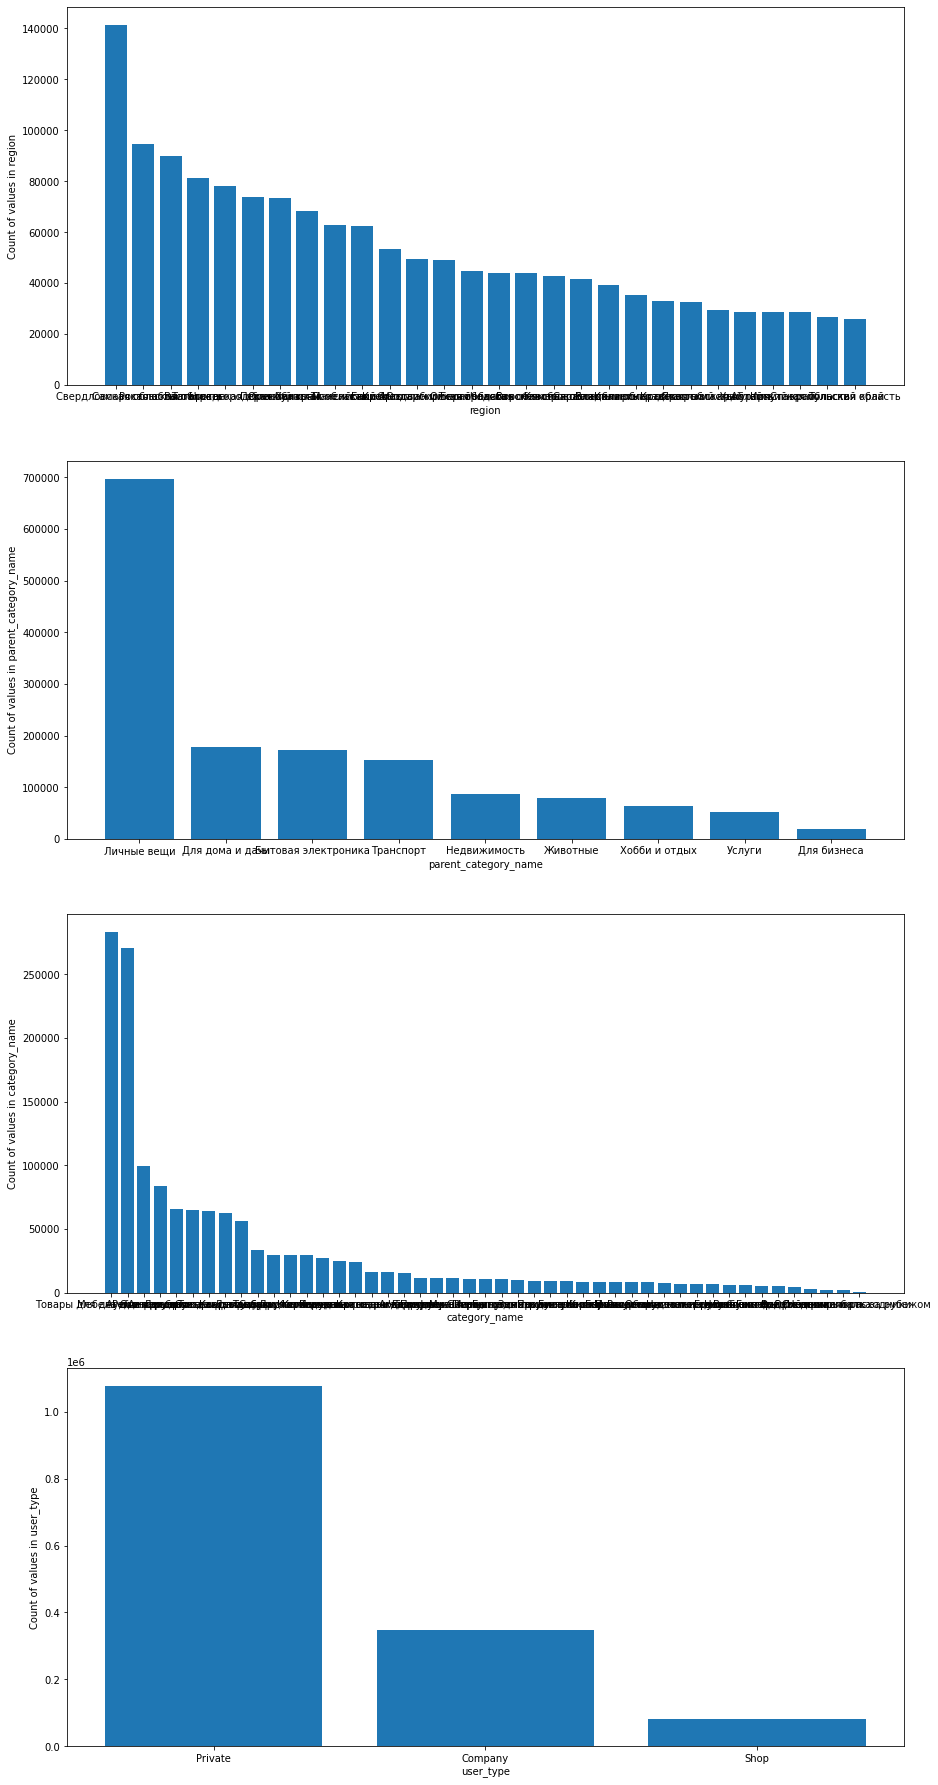

In [9]:
cols = ["region", "parent_category_name", "category_name", "user_type"]
fig, ax = plt.subplots(len(cols), 1, figsize=(15, 8*len(cols)))
for i, col in enumerate(cols):
    ax[i].bar(train_df[col].unique(), train_df[col].value_counts())
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count of values in {}".format(col))
fig.show()

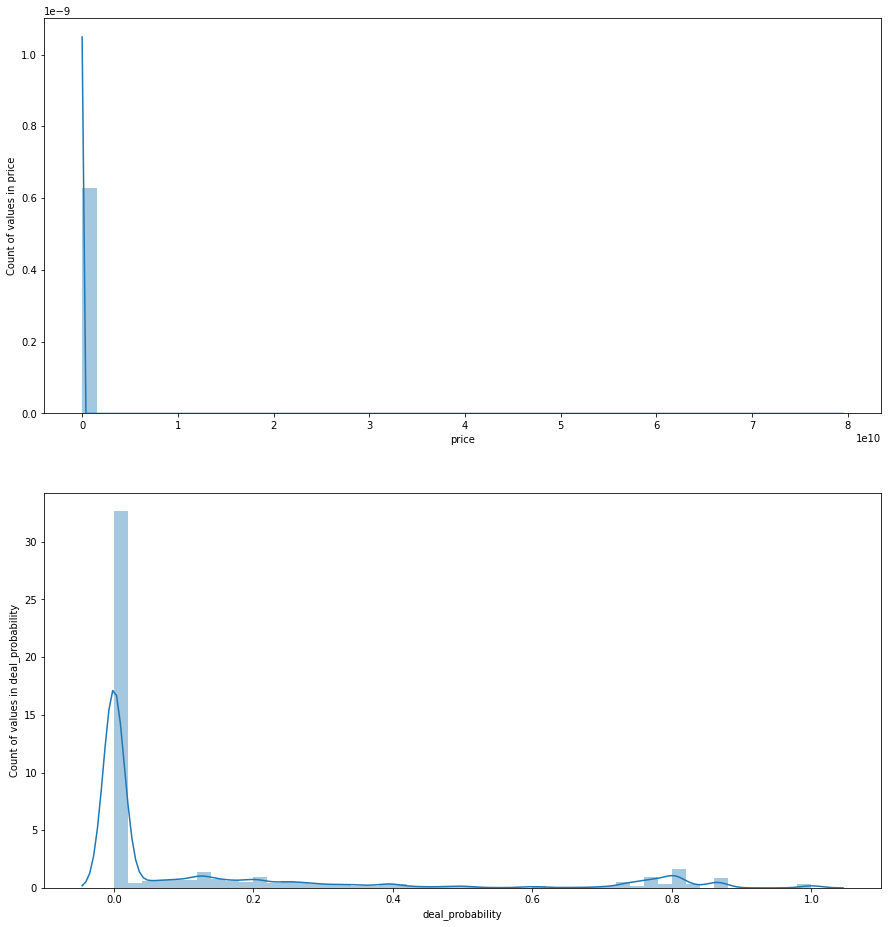

In [15]:
cols = ["price", "deal_probability"]
fig, ax = plt.subplots(len(cols), 1, figsize=(15, 8*len(cols)))
for i, col in enumerate(cols):
    sns.distplot(train_df[col], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count of values in {}".format(col))
fig.show()

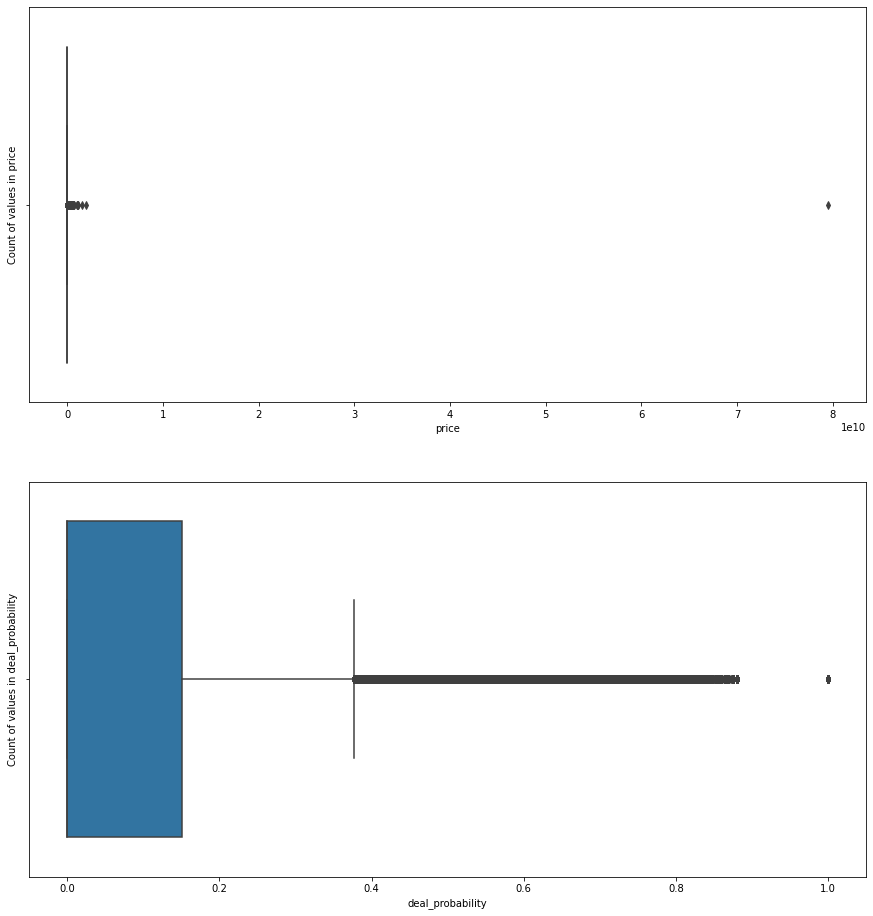

In [16]:
cols = ["price", "deal_probability"]
fig, ax = plt.subplots(len(cols), 1, figsize=(15, 8*len(cols)))
for i, col in enumerate(cols):
    sns.boxplot(train_df[col], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count of values in {}".format(col))
fig.show()

In [18]:
train_df.isnull().any()

item_id                 False
user_id                 False
region                  False
city                    False
parent_category_name    False
category_name           False
param_1                  True
param_2                  True
param_3                  True
title                   False
description              True
price                    True
item_seq_number         False
activation_date         False
user_type               False
image                    True
image_top_1              True
deal_probability        False
dtype: bool